# 高斯朴素贝叶斯

In [1]:
# 基础包
import numpy as np
import pandas as pd

# sklearn相关模型包
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR

# 数据集
from sklearn.datasets import load_digits

## 数据集处理
from sklearn.model_selection import train_test_split

## 效果评估
from sklearn.metrics import confusion_matrix as CM
from sklearn.model_selection import learning_curve # 画学习曲线的类
from sklearn.model_selection import ShuffleSplit # 设定交叉验证模式的类

# 画图
import matplotlib.pyplot as plt
import seaborn as sns

# 时间模块
import datetime
from time import time

In [2]:
test_size=0.3
digits=load_digits()
x,y=digits.data,digits.target

train_X,test_X,train_Y,test_Y=train_test_split(x,y,test_size=test_size)
print(train_X[:10])
print(train_Y[:10])

[[ 0.  0.  2. 14. 13.  8.  0.  0.  0.  0. 12. 13. 12. 13.  0.  0.  0.  0.
  11.  6.  6. 16.  4.  0.  0.  0.  5. 16. 15. 16.  8.  0.  0.  0.  0.  2.
   4. 11.  8.  0.  0.  0.  0.  0.  0. 11.  9.  0.  0.  2. 13.  7.  1. 11.
  10.  0.  0.  0.  2. 10. 15. 16.  2.  0.]
 [ 0.  2. 13. 16. 16. 16. 15.  2.  0.  8. 16. 12.  8.  4.  1.  0.  0.  5.
  16. 13.  1.  0.  0.  0.  0.  0.  8. 16.  8.  0.  0.  0.  0.  0.  0. 10.
  16.  0.  0.  0.  0.  0.  0.  9. 16.  0.  0.  0.  0.  0.  3. 13. 12.  0.
   0.  0.  0.  2. 16. 16.  6.  0.  0.  0.]
 [ 0.  0.  7. 15. 13.  0.  0.  0.  0.  9. 16. 15. 16.  5.  0.  0.  0. 12.
  16.  5. 15.  6.  0.  0.  0.  0.  7.  2. 13.  9.  0.  0.  0.  0.  0.  1.
  16.  7.  0.  0.  0.  0.  0.  6. 16.  4.  0.  0.  0.  0.  1. 15. 16. 12.
  15.  7.  0.  0.  5. 16. 14. 12. 12. 11.]
 [ 0.  0. 11. 14. 10.  1.  0.  0.  0.  0. 16. 15. 14. 13.  0.  0.  0.  1.
  14.  8.  3. 16.  2.  0.  0.  0.  7. 16. 13. 16.  2.  0.  0.  0.  0. 12.
  16.  9.  0.  0.  0.  0.  1. 14. 16. 12.  0.  0.  0.  0.

In [3]:
# 训练
gnb=GaussianNB().fit(train_X,train_Y)
acc_score=gnb.score(test_X,test_Y)
print(acc_score)

0.8351851851851851


In [4]:
# 预测
pred_Y=gnb.predict(test_X)
# print(pred_Y)
prob=gnb.predict_proba(test_X)
# print(prob)
# print(prob[1,:].sum())

In [5]:
C=CM(test_Y,pred_Y)
C

array([[46,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 54,  1,  0,  0,  0,  0,  1,  6,  0],
       [ 0,  3, 36,  1,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  0, 31,  0,  4,  0,  2, 18,  2],
       [ 0,  1,  0,  0, 44,  1,  0,  4,  2,  0],
       [ 0,  1,  0,  0,  0, 44,  0,  1,  1,  0],
       [ 0,  0,  1,  0,  1,  0, 58,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  0, 59,  1,  0],
       [ 0,  3,  0,  1,  0,  1,  0,  0, 49,  0],
       [ 0,  2,  1,  2,  0,  2,  0,  1,  7, 30]])

Text(33.0, 0.5, 'true')

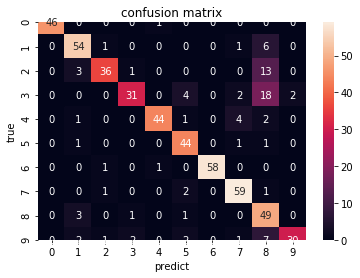

In [6]:
# 热力图
f,ax=plt.subplots()
sns.heatmap(C,annot=True,ax=ax) #画热力图
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

In [7]:
# 探索朴素贝叶斯的拟合效果和运行速度
title=["Naive Bayes","DecisionTree","SVM,RBF kernel","RandomForest","Logistic"]
model=[GaussianNB(),DTC(),SVC(gamma=0.001),RFC(n_estimators=50),LR(C=0.1,solver='lbfgs')]
cv=ShuffleSplit(n_splits=50,test_size=0.2,random_state=0)

In [10]:
def plot_learning_curve(estimator,title,X,y
                       ,ax # 选择子图
                       ,ylim=None # 设置纵坐标的取值范围
                       ,cv=None # 交叉验证
                       ,n_jobs=None # 设定所要使用的线程
                      ):
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("training examples")
    ax.set_ylabel("Score")
    ax.grid() # 显示网格作为背景，不是必须
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',color='r',label='Training Score')
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',color='g',label='Test Score')
    ax.legend(loc='best')
    return ax

Naive Bayes:00:00:838753
DecisionTree:00:00:785694
SVM,RBF kernel:00:05:416276
RandomForest:00:06:278790
Logistic:00:12:734659


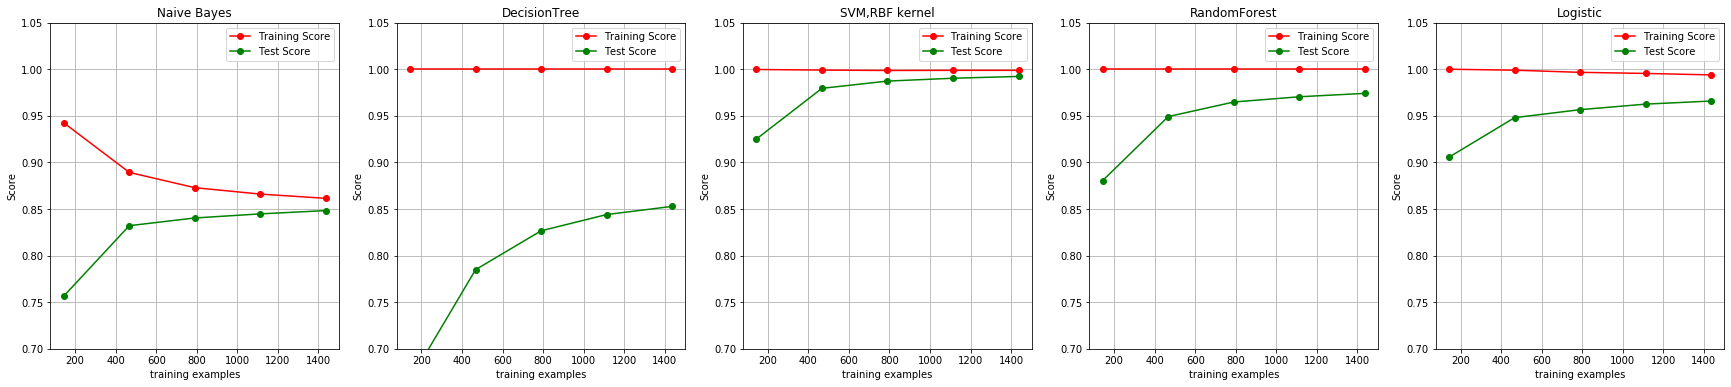

In [11]:
fig,axes=plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model): # 同时循环三个结构一致的量
    times=time()
    plot_learning_curve(estimator,title_,x,y,ax=axes[ind],ylim=[0.7,1.05],n_jobs=4,cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()    

# 多项式朴素贝叶斯

In [77]:
## 模型
from sklearn.naive_bayes import MultinomialNB
## 数据集处理
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# 数据集
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss
## 基础包
import numpy as np
import pandas as pd

In [79]:
class_1=500
class_2=500
centers=[[0.0,0.0],[2.0,2.0]]
cluster_std=[0.5,0.5]
x,y=make_blobs(n_samples=[class_1,class_2],
              centers=centers,
              cluster_std=cluster_std,
              random_state=0,
              shuffle=False)

In [80]:
np.unique(y)

array([0, 1])

In [81]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=420)

In [82]:
# 归一化，train_x_仍然是连续型数据，不太适合多项式朴素贝叶斯
mms=MinMaxScaler().fit(train_x) # 特征矩阵归一化
train_x_=mms.transform(train_x)
test_x_=mms.transform(test_x)

In [100]:
train_x_[:10]

array([[0.59865607, 0.69942184],
       [0.4251378 , 0.49186641],
       [0.3662295 , 0.35621004],
       [0.10337658, 0.27247908],
       [0.67342881, 0.62928689],
       [0.71820471, 0.72622857],
       [0.23111001, 0.28318898],
       [0.58343585, 0.87297203],
       [0.71992543, 0.59922381],
       [0.70546644, 0.65411358]])

In [83]:
mnb=MultinomialNB().fit(train_x_,train_y)

In [92]:
# 重要属性1：调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
# 由于概率在[0,1]之间，因此对数先验概率永远是负值
# 先验概率接近，说明不存在样本不均衡问题
a=mnb.class_log_prior_          ## 先验概率的log值
b=mnb.class_log_prior_.shape    ## 等于标签中的类别数量
c=np.exp(mnb.class_log_prior_)  ## 真正的先验概率值
print("\n先验概率的log值:\n",a)
print("\n先验概率的log值的shape:\n",b)
print("\n先验概率:\n",c)


先验概率的log值:
 [-0.69029411 -0.69600841]

先验概率的log值的shape:
 (2,)

先验概率:
 [0.50142857 0.49857143]


In [95]:
# 重要属性2：返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
a=mnb.feature_log_prob_          ## 2个特征，2个标签
b=mnb.feature_log_prob_.shape    ## 
c=np.exp(mnb.feature_log_prob_)  ## 
print("\n每个特征每个标签下的概率的log值:\n",a)
print("\n每个特征每个标签下的概率的log值的shape:\n",b)
print("\n每个特征每个标签下的概率:\n",c)


每个特征每个标签下的概率的log值:
 [[-0.76164788 -0.62903951]
 [-0.72500918 -0.6622691 ]]

每个特征每个标签下的概率的log值的shape:
 (2, 2)

每个特征每个标签下的概率:
 [[0.4668964  0.5331036 ]
 [0.48432013 0.51567987]]


In [96]:
# 重要属性3：在fit时每个标签类别下的样本数
# 当fit接口的sample_weight被设置时，该接口返回的值也会受到加权的影响
a=mnb.class_count_          ## 
b=mnb.class_count_.shape    ## 返回和标签类别一样的结构
print("\n每个标签类别下的样本数:\n",a)
print("\n样本数结构:\n",b)


每个标签类别下的样本数:
 [351. 349.]

样本数结构:
 (2,)


In [99]:
# 效果不理想
mnb.predict(test_x_)
mnb.predict_proba(test_x_) # 每个样本在每个标签下的概率
print(mnb.score(test_x_,test_y))
print(brier_score_loss(test_y,mnb.predict_proba(test_x_)[:,1],pos_label=1))

0.5433333333333333
0.24977828412546027


In [101]:
# 将连续型输入改成分类型数据(哑变量），无需归一化
from sklearn.preprocessing import KBinsDiscretizer # 对连续性变量进行分箱
kbs=KBinsDiscretizer(n_bins=10,encode='onehot').fit(train_x)

In [105]:
train_x_=kbs.transform(train_x)
test_x_=kbs.transform(test_x)
mnb=MultinomialNB().fit(train_x_,train_y)
print(mnb.score(test_x_,test_y))
print(brier_score_loss(test_y,mnb.predict_proba(test_x_)[:,1],pos_label=1))

0.9966666666666667
0.0014593932778211862


# 伯努利朴素贝叶斯BernoulliNB

In [78]:
## 模型
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

## 数据集处理
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 数据集
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

## 基础包
import numpy as np
import pandas as pd

In [79]:
## 准备数据
class_1=500
class_2=500
centers=[[0.0,0.0],[2.0,2.0]]
cluster_std=[0.5,0.5]
x,y=make_blobs(n_samples=[class_1,class_2],
              centers=centers,
              cluster_std=cluster_std,
              random_state=0,
              shuffle=False)

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=420)

# 普通来说，应该用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化，
# 这样效率低，故这里采用归一化后直接设置阈值的方式
mms=MinMaxScaler().fit(train_x) # 特征矩阵归一化
train_x_=mms.transform(train_x)
test_x_=mms.transform(test_x)

In [88]:
# 不设置二值化
bn1_=BernoulliNB().fit(train_x_,train_y)
print(bn1_.score(test_x_,test_y))
print(brier_score_loss(test_y,bn1_.predict_proba(test_x_)[:,1],pos_label=1))

0.49666666666666665
0.25000009482193225


In [89]:
# 设置二值化
bn1_=BernoulliNB(binarize=0.5).fit(train_x_,train_y)
print(bn1_.score(test_x_,test_y))
print(brier_score_loss(test_y,bn1_.predict_proba(test_x_)[:,1],pos_label=1))

0.9833333333333333
0.010405875827339534


# 探索样本不平衡的影响和补集朴素贝叶斯

In [112]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer ## 分箱
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss,recall_score,roc_auc_score
from time import time
import datetime

In [109]:
## 准备数据, 
class_1=50000 # 多数类为500000个样本，负例
class_2=500 # 少数类500个样本,正例
centers=[[0.0,0.0],[5.0,5.0]] # 设定两个类别的中心
cluster_std=[3,1] # 设定两个类别的方差，通常样本多则方差大，样本少则方差小
x,y=make_blobs(n_samples=[class_1,class_2], # 分别有class_1个负例，class_2个正例
              centers=centers,
              cluster_std=cluster_std,
              random_state=0,
              shuffle=False)

In [116]:
# 查看贝叶斯在样本不均衡上的表现
name=["Multinomial","Gaussian","Bernoulli","Complement"]
models=[MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]  # 统一做成二分类

for name,clf in zip(name,models):
    times=time()
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=420)
    # 预处理，2个特征分10箱，且onehot处理后则20个特征都是二分类
    if name!="Gaussian":
        kbs=KBinsDiscretizer(n_bins=10,encode='onehot').fit(train_x)
        train_x=kbs.transform(train_x)
        test_x=kbs.transform(test_x)
    # 拟合   
    clf.fit(train_x,train_y)
    pred_y=clf.predict(test_x)
    proba=clf.predict_proba(test_x)[:,1]
    score=clf.score(test_x,test_y)  # 准确率：预测正确的样本比例，在不均衡样本中使用有问题
    brier=brier_score_loss(test_y,proba,pos_label=1)
    recall=recall_score(test_y,pred_y) # 召回率：正样本中有多少被预测正确
    auc=roc_auc_score(test_y,proba) # 对样本是否均衡不敏感
    print(name,":")
    print("Brier loss score:{:.3f}".format(brier))
    print("Accuracy:{:.3f}".format(score))
    print("Recall:{:.3f}".format(recall))
    print("Auc:{:.3f}".format(auc))
    print("time cost:{}\n".format(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
    

Multinomial :
Brier loss score:0.007
Accuracy:0.990
Recall:0.000
Auc:0.991
time cost:00:00:040229

Gaussian :
Brier loss score:0.006
Accuracy:0.990
Recall:0.438
Auc:0.993
time cost:00:00:019154

Bernoulli :
Brier loss score:0.009
Accuracy:0.987
Recall:0.771
Auc:0.987
time cost:00:00:036497

Complement :
Brier loss score:0.038
Accuracy:0.953
Recall:0.987
Auc:0.991
time cost:00:00:031554



# 概率分类器的评估指标

In [7]:
# 基础包
import numpy as np
import pandas as pd

## sklearn相关模型包
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

# 数据集
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification as mc

# 数据集处理
from sklearn.model_selection import train_test_split

## 评估指标
from sklearn.metrics import brier_score_loss  ## 布里尔分数
from sklearn.metrics import log_loss  ## 对数似然函数

# 画图
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x,y=mc(n_samples=100000,
       n_features=20, # 20个特征
       n_classes=2, # 二分类
       n_informative=2, # 其中有2个代表较多信息
       n_redundant=10, # 10个都是冗余特征
       random_state=42)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.99,random_state=42)

In [14]:
gnb=GaussianNB().fit(train_x,train_y)
y_pred=gnb.predict(test_x)
prob_pos=gnb.predict_proba(test_x)[:,1] ## 预测概率，横坐标
# test_y是纵坐标
clf_score=gnb.score(test_x,test_y)

In [11]:
# 横纵坐标，概率是顺序的
df=pd.DataFrame({'ytrue':test_y[:500],"probability":prob_pos[:500]})
# 利用字典创建DataFrame ({"列的名称"：[列的值]})
df=df.sort_values(by='probability') # 按照概率排序
df.index=range(df.shape[0]) # 重置index
df

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17
...,...,...
495,1,1.000000e+00
496,1,1.000000e+00
497,1,1.000000e+00
498,1,1.000000e+00


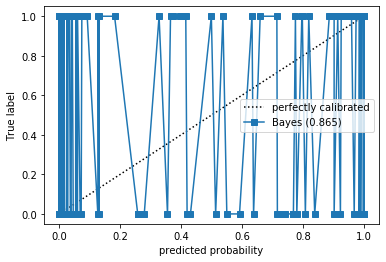

In [17]:
## 画图
# 横坐标在做，纵坐标只有0、1
fig=plt.figure()
ax1=plt.subplot()
ax1.plot([0,1],[0,1],'k:',label='perfectly calibrated') ## 对角线作为对比
ax1.plot(df["probability"],df['ytrue'],'s-',label='%s (%1.3f)' %("Bayes",clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predicted probability")
ax1.set_ylim([-0.05,1.05])
ax1.legend()
plt.show()

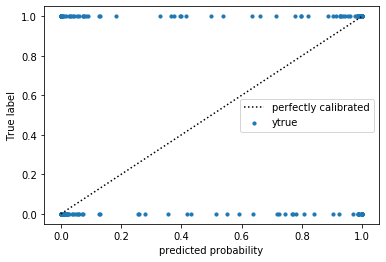

In [23]:
## 用散点图验证，纵坐标只有0、1两种
fig=plt.figure()
ax1=plt.subplot()
ax1.plot([0,1],[0,1],'k:',label='perfectly calibrated') ## 对角线作为对比
ax1.scatter(df["probability"],df['ytrue'],s=10,label='ytrue')
ax1.set_ylabel("True label")
ax1.set_xlabel("predicted probability")
ax1.set_ylim([-0.05,1.05])
ax1.legend()
plt.show()

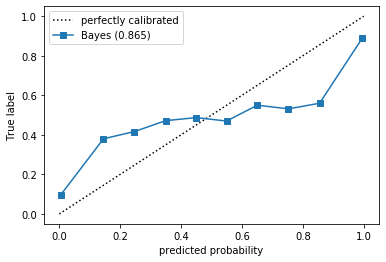

In [25]:
## 纵坐标需要转换成真实概率而非真是分类
# 将数据进行分箱，规定箱子中真实的少数类所占的别理就是这个箱子的真实概率trueproba，作为纵坐标
from sklearn.calibration import calibration_curve
trueproba,predproba=calibration_curve(test_y,prob_pos,n_bins=10)
fig=plt.figure()
ax1=plt.subplot()
ax1.plot([0,1],[0,1],'k:',label='perfectly calibrated') ## 对角线作为对比
ax1.plot(predproba,trueproba,'s-',label='%s (%1.3f)' %("Bayes",clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predicted probability")
ax1.set_ylim([-0.05,1.05])
ax1.legend()
plt.show()

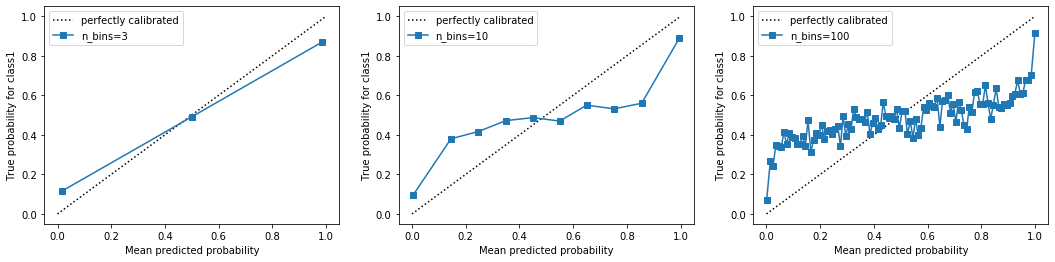

In [26]:
## 不同分箱下的可靠性曲线
fig,axes=plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate([3,10,100]):
    ax=axes[ind]
    ax.plot([0,1],[0,1],'k:',label='perfectly calibrated') ## 对角线作为对比
    trueproba,predproba=calibration_curve(test_y,prob_pos,n_bins=i)
    ax.plot(predproba,trueproba,'s-',label='n_bins={}'.format(i))
    ax.set_ylabel("True probability for class1")
    ax.set_xlabel("Mean predicted probability")
    ax.set_ylim([-0.05,1.05])
    ax.legend()
plt.show()

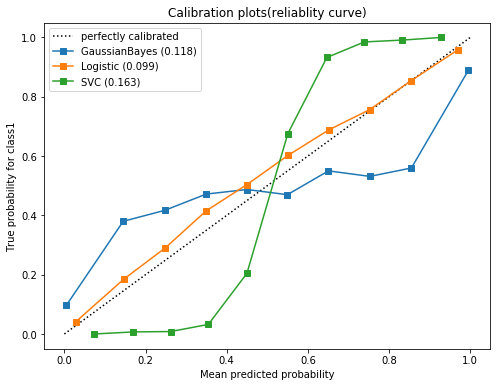

In [43]:
## 建立更多模型
name=["GaussianBayes","Logistic","SVC"]
gnb=GaussianNB()
logi=LR(C=1,solver='lbfgs',max_iter=30000,multi_class="auto")
svc=SVC(kernel="linear",gamma=1)

fig,ax1=plt.subplots(figsize=(8,6))
ax1.plot([0,1],[0,1],'k:',label='perfectly calibrated') ## 对角线作为对比
for clf,name_ in zip([gnb,logi,svc],name):
    clf.fit(train_x,train_y)
    pred_y=clf.predict(test_x)
    # hasattr(obj,name):查看一个类obj中是否存在名字为name的接口，存在则返回true
    if hasattr(clf,"predict_proba"):
        prob_pos=clf.predict_proba(test_x)[:,1]
    else:
        prob_pos=clf.decision_function(test_x)
        prob_pos=(prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())
    # 返回布里尔分数
    clf_score=brier_score_loss(test_y,prob_pos,pos_label=y.max())
    trueproba,predproba=calibration_curve(test_y,prob_pos,n_bins=10)
    ax1.plot(predproba,trueproba,'s-',label='%s (%1.3f)' %(name_,clf_score))
ax1.set_ylabel("True probability for class1")
ax1.set_xlabel("Mean predicted probability")
ax1.set_ylim([-0.05,1.05])
ax1.legend()
ax1.set_title("Calibration plots(reliablity curve)")
plt.show()

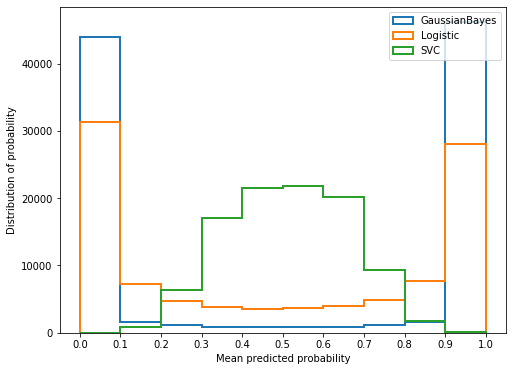

In [66]:
## 建立更多模型
name=["GaussianBayes","Logistic","SVC"]
gnb=GaussianNB()
logi=LR(C=1,solver='lbfgs',max_iter=30000,multi_class="auto")
svc=SVC(kernel="linear",gamma=1)

fig,ax2=plt.subplots(figsize=(8,6))

for clf,name_ in zip([gnb,logi,svc],name):
    clf.fit(train_x,train_y)
    pred_y=clf.predict(test_x)
    # hasattr(obj,name):查看一个类obj中是否存在名字为name的接口，存在则返回true
    if hasattr(clf,"predict_proba"):
        prob_pos=clf.predict_proba(test_x)[:,1]
    else:
        prob_pos=clf.decision_function(test_x)
        prob_pos=(prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())
    ax2.hist(prob_pos
            ,bins=10
            ,label=name_
            ,histtype="step" # 设置直方图为透明
            ,lw=2) # 设置直方图每个柱子描边的粗细
ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05,1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend()
plt.show()

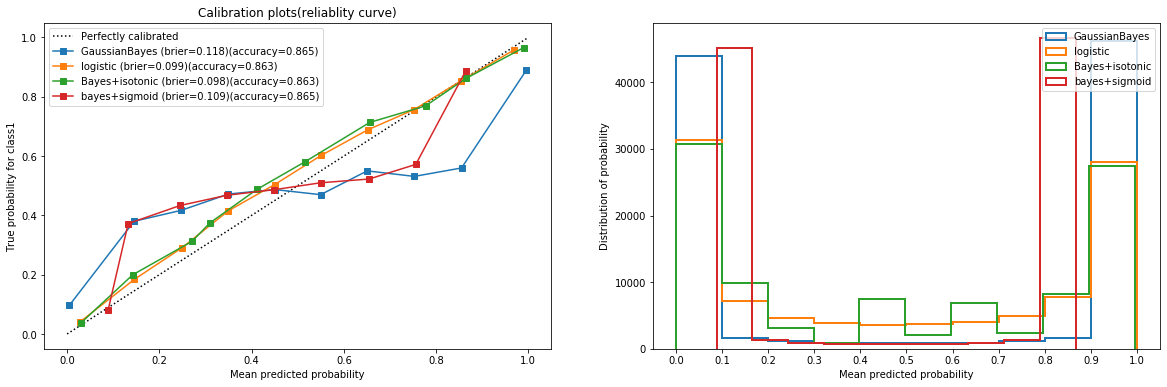

In [76]:
## 校准模型
def plot_calib(models,name,train_x,test_x,train_y,test_y,n_bins=10):
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
    ax1.plot([0,1],[0,1],'k:',label='Perfectly calibrated')
    
    for clf,name_ in zip(models,name):
        clf.fit(train_x,train_y)
        pred_y=clf.predict(test_x)
        # hasattr(obj,name):查看一个类obj中是否存在名字为name的接口，存在则返回true
        if hasattr(clf,"predict_proba"):
            prob_pos=clf.predict_proba(test_x)[:,1]
        else:
            prob_pos=clf.decision_function(test_x)
            prob_pos=(prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())
        clf_score=brier_score_loss(test_y,prob_pos,pos_label=y.max())
        score=clf.score(test_x,test_y)
        trueproba,predproba=calibration_curve(test_y,prob_pos,n_bins=10)
        ax1.plot(predproba,trueproba,'s-',label='%s (brier=%1.3f)(accuracy=%1.3f)' %(name_,clf_score,score))
        ax2.hist(prob_pos,bins=10,label=name_,histtype="step",lw=2) 
    ax1.set_ylabel("True probability for class1")
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_ylim([-0.05,1.05])
    ax1.legend()
    ax1.set_title("Calibration plots(reliablity curve)")

    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05,1.05])
    ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    ax2.legend()

    plt.show()

from sklearn.calibration import CalibratedClassifierCV
name=['GaussianBayes',"logistic",'Bayes+isotonic','bayes+sigmoid']

gnb=GaussianNB()
models=[gnb
       ,LR(C=1,solver='lbfgs',max_iter=30000,multi_class="auto")
       ,CalibratedClassifierCV(gnb,cv=2,method='isotonic')
       ,CalibratedClassifierCV(gnb,cv=2,method='sigmoid')]

plot_calib(models,name,train_x,test_x,train_y,test_y)

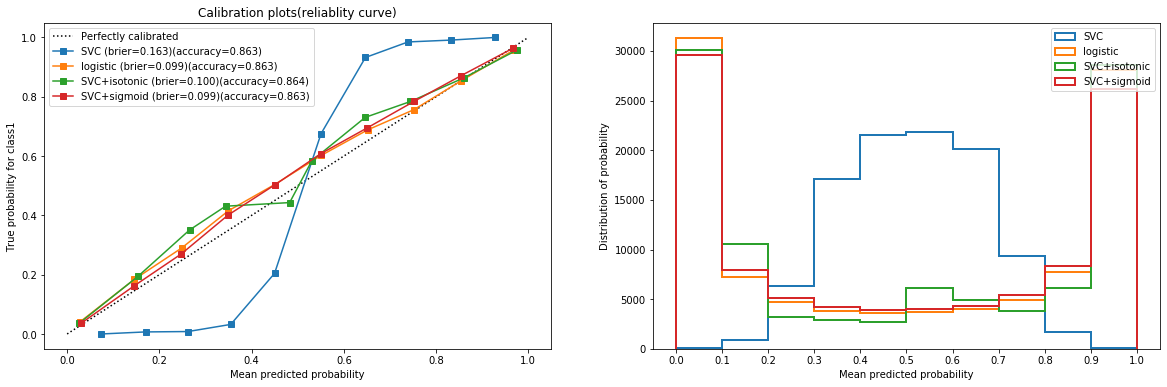

In [77]:
from sklearn.calibration import CalibratedClassifierCV
name=['SVC',"logistic",'SVC+isotonic','SVC+sigmoid']

svc=SVC(kernel="linear",gamma=1)
models=[svc
       ,LR(C=1,solver='lbfgs',max_iter=30000,multi_class="auto")
       ,CalibratedClassifierCV(svc,cv=2,method='isotonic')
       ,CalibratedClassifierCV(svc,cv=2,method='sigmoid')]

plot_calib(models,name,train_x,test_x,train_y,test_y)

# 文本编码简介：单词计数向量 和 TF-IDF算法

In [125]:
# 单词计数向量 
from sklearn.feature_extraction.text import CountVectorizer # 样本转成数字
import pandas as pd

sample=["Machine learning is fascinatin, it is wonderful",
       "Machine learning is a sensational techonology",
       "Elsa is a popular character"]
vec=CountVectorizer()
x=vec.fit_transform(sample) # 得到 3X11的稀疏矩阵
x
vec.get_feature_names() # 按照字母的顺序排列，x.get_feature_names()不对，一个矩阵肯定没有接口
# 稀疏矩阵无法输入pandas
CVresult=pd.DataFrame(x.toarray(),columns=vec.get_feature_names())
CVresult

## 第一个样本长，对每个特征的贡献大，模型更倾向于学习长样本，即样本不均衡
## 出现次数多的词不代表有意义，如判断情感，is次数多，权重大，但无意义

,character,elsa,fascinatin,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


In [127]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF # 样本转成数字
import pandas as pd

sample=["Machine learning is fascinatin, it is wonderful",
       "Machine learning is a sensational techonology",
       "Elsa is a popular character"]
vec=TFIDF()
x=vec.fit_transform(sample) # 得到 3X11的稀疏矩阵
x
vec.get_feature_names()# 按照字母的顺序排列，x.get_feature_names()不对，一个矩阵肯定没有接口
TFIDFresult=pd.DataFrame(x.toarray(),columns=vec.get_feature_names())
TFIDFresult

,character,elsa,fascinatin,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0.000000,0.000000,0.424396,0.501310,0.424396,0.322764,0.322764,0.000000,0.000000,0.000000,0.424396
1,0.000000,0.000000,0.000000,0.315444,0.000000,0.406192,0.406192,0.000000,0.534093,0.534093,0.000000
2,0.546454,0.546454,0.000000,0.322745,0.000000,0.000000,0.000000,0.546454,0.000000,0.000000,0.000000


In [128]:
CVresult.sum(axis=0)/CVresult.sum(axis=0).sum()

character      0.0625
elsa           0.0625
fascinatin     0.0625
is             0.2500
it             0.0625
learning       0.1250
machine        0.1250
popular        0.0625
sensational    0.0625
techonology    0.0625
wonderful      0.0625
dtype: float64

In [129]:
TFIDFresult.sum(axis=0)/TFIDFresult.sum(axis=0).sum()

character      0.083071
elsa           0.083071
fascinatin     0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
techonology    0.081192
wonderful      0.064516
dtype: float64

# 案例

In [167]:
from sklearn.datasets import fetch_20newsgroups #20个新闻组的语料库，英文
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF # TF-IDF算法
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
from sklearn.metrics import brier_score_loss,recall_score,roc_auc_score 
from sklearn.calibration import CalibratedClassifierCV # 概率校准

In [136]:
# 数据，通过参数提取数据
categories=["sci.space","rec.sport.hockey","talk.politics.guns","talk.politics.mideast"]
train=fetch_20newsgroups(subset='train',categories=categories) 
test=fetch_20newsgroups(subset='test',categories=categories) 
# 初次运行，需要下载
# fetcg_20gnewsgroups是一个类，有接口可以调用

In [139]:
train # 类字典结果，键值对结构

{'data': ["From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)\nSubject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)\nNntp-Posting-Host: vipunen.hut.fi\nOrganization: Helsinki University of Technology, Finland\nLines: 51\n\nIn <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:\n\n>: FINLAND:  \n>: \n>: D-Jyrki Lumme.......20\n>: D-Teppo Numminen....20\n>: D-Peter Ahola.......13\n>: \n>Well well, they don't like our defenders (mainly Lumme and Numminen)...\n\nAbout 25 is correct for Numminen and Lumme.\n\n\n>: R-Teemu Selanne.....27\n>: \n>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.\n\nNo, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.\n\n>: well in the Canada Cup and World Championships largely due to the efforts of\n>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's\n>: presumably a lot of decent players in Finland that wouldn't be superstars at\n>: t

In [137]:
# 标签的分类
train.target_names

['rec.sport.hockey',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast']

In [141]:
# 查看共有多少文章
len(train.data)

2303

In [142]:
# 查看一篇文章，比较乱
train.data[0]

"From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)\nSubject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)\nNntp-Posting-Host: vipunen.hut.fi\nOrganization: Helsinki University of Technology, Finland\nLines: 51\n\nIn <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:\n\n>: FINLAND:  \n>: \n>: D-Jyrki Lumme.......20\n>: D-Teppo Numminen....20\n>: D-Peter Ahola.......13\n>: \n>Well well, they don't like our defenders (mainly Lumme and Numminen)...\n\nAbout 25 is correct for Numminen and Lumme.\n\n\n>: R-Teemu Selanne.....27\n>: \n>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.\n\nNo, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.\n\n>: well in the Canada Cup and World Championships largely due to the efforts of\n>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's\n>: presumably a lot of decent players in Finland that wouldn't be superstars at\n>: the highest

In [143]:
# 打印一下，比较好看
print(train.data[0])

From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)
Subject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)
Nntp-Posting-Host: vipunen.hut.fi
Organization: Helsinki University of Technology, Finland
Lines: 51

In <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:

>: FINLAND:  
>: 
>: D-Jyrki Lumme.......20
>: D-Teppo Numminen....20
>: D-Peter Ahola.......13
>: 
>Well well, they don't like our defenders (mainly Lumme and Numminen)...

About 25 is correct for Numminen and Lumme.


>: R-Teemu Selanne.....27
>: 
>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.

No, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.

>: well in the Canada Cup and World Championships largely due to the efforts of
>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's
>: presumably a lot of decent players in Finland that wouldn't be superstars at
>: the highest level but still valuable rol

In [144]:
np.unique(train.target)

array([0, 1, 2, 3])

In [152]:
# 是否存在样本不均衡问题
for i in [0,1,2,3]:
    print(i,(train.target==i).sum()/len(train.target))

0 0.26052974381241856
1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


In [154]:
# 使用TF-IDF编码
train_x,test_x,train_y,test_y=train.data,test.data,train.target,test.target
tfidf=TFIDF().fit(train_x)
train_x_=tfidf.transform(train_x)  ## 特征按字母排序
test_x_=tfidf.transform(test_x)
train_x_

<2303x40725 sparse matrix of type '<class 'numpy.float64'>'
	with 430306 stored elements in Compressed Sparse Row format>

In [156]:
tosee=pd.DataFrame(train_x_.toarray(),columns=tfidf.get_feature_names())
tosee.head()

,00,000,0000,00000,000000,000021,000062david42,000152,000246,000256,...,zwrm,zx,zx6wre,zxp,zxqi,zy,zyg,zz,zz_g9q3,zzzzzz
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.058046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
tosee.shape

(2303, 40725)

In [172]:
## 建模
name=["Multinomial"
      ,"Multinomial+isotonic"
      ,"Multinomial+sigmoid"
      ,"Complement"
      ,"Complement+isotonic"
      ,"Complement+sigmoid"
      ,"Bournulli"
      ,"Bournulli+isotonic"
      ,"Bournulli+sigmoid"]
models=[MultinomialNB()
        ,CalibratedClassifierCV(MultinomialNB(),cv=2,method='isotonic')
        ,CalibratedClassifierCV(MultinomialNB(),cv=2,method='sigmoid')
        ,ComplementNB()
        ,CalibratedClassifierCV(ComplementNB(),cv=2,method='isotonic')
        ,CalibratedClassifierCV(ComplementNB(),cv=2,method='sigmoid')
        ,BernoulliNB()
        ,CalibratedClassifierCV(BernoulliNB(),cv=2,method='isotonic')
        ,CalibratedClassifierCV(BernoulliNB(),cv=2,method='sigmoid')]
for name,clf in zip(name,models):
    clf.fit(train_x_,train_y)
    pred_y=clf.predict(test_x_)
    proba=clf.predict_proba(test_x_)
    score=clf.score(test_x_,test_y)
    print(name)
    print("Accuracy:{:.3f}".format(score))
    print("\n")
    
## 补集朴素贝叶斯效果更好，sigmoid校准后效果略有提升
## 伯努利朴素贝叶斯在isotonic校准后精确度提升明显

Multinomial
Accuracy:0.975


Multinomial+isotonic
Accuracy:0.973


Multinomial+sigmoid
Accuracy:0.973


Complement
Accuracy:0.986


Complement+isotonic
Accuracy:0.985


Complement+sigmoid
Accuracy:0.986


Bournulli
Accuracy:0.902


Bournulli+isotonic
Accuracy:0.952


Bournulli+sigmoid
Accuracy:0.879


